# Исследование рынка компьютерных игр по различным платформам

# Введение

Исследование проводится для интернет-магазина компьютерных игр "Стримчик". Необходимо выявить, какие данные влияют на успешность продажи различных игр, чтобы сделать ставку на популярный продукт и спланировать рекламные кампании. Исходные данные представляют собой продажи различных игр на различных платформах. Стоит отметить, что данные за 2016 год неполные.

План исследования: 
1. Открытие файла с данными и изучение общей информации
2. Предобработка данных
3. Исследовательский анализ данных
4. Составление портрета пользователя в каждом регионе
5. Проверка гипотиз
6. Общий вывод

## Открытие файла с данными

Добавим различные библиотеки.

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

Загрузим файл с данными.

In [2]:
data = pd.read_csv('/datasets/games.csv')
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Изучим общую информацию.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Общая информация показывает, что данные загрузились без ошибок. Видно, что в некоторых столбцах есть пропуски, их обработкой займёмся в следующем пункте.

## Предобработка данных

Приведём название столбцов к нижнему регистру.

In [4]:
data.rename(columns=str.lower, inplace=True)

In [5]:
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Проверим на наличие дубликатов.

In [6]:
duplicates = data[data.duplicated()]
duplicates

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Дубликатов нет.

Найдём неполные дубликаты по названию игр.

In [7]:
duplicates = data[data.duplicated(subset=['name', 'platform', 'year_of_release'])]
len(duplicates)

2

Удалим неполные дубликаты.

In [8]:
data = data.drop_duplicates(subset=['name', 'platform', 'year_of_release'])
len(data)

16713

Преобразуем данные некоторых столбцов к нужному типу. Год релиза и оценку критиков преобразуем к int.

In [9]:
data['year_of_release'] = data['year_of_release'].astype('Int64')

In [10]:
data['critic_score'] = data['critic_score'].astype('Int64')

Обработаем пропуски.

Найдём количество пропусков во всех столбцах.

In [11]:
data.isna().sum()

name                  1
platform              0
year_of_release     269
genre                 1
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8577
user_score         6700
rating             6765
dtype: int64

Обработаем пропуски в столбце name. Их всего 2, так как количество по сравнению с таблицей незначительное их можно удалить.

In [12]:
data = data.dropna(subset=['name'])
data['name'].isna().sum()

0

Аналогично поступим со столбцом genre.

In [13]:
data = data.dropna(subset=['genre'])
data['genre'].isna().sum()

0

Обработаем пропуски в столбце rating. Скорее всего пустым значениям не был выставлен рейтинг, заменим его на RP.

In [14]:
data['rating'] = data['rating'].fillna('RP')
data['rating'].isna().sum()

0

<div class="alert alert-dan ger">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />    Скажи пожалуйста, по какой причине мы так решили?
        
        Обработаем пропуски в столбце rating. Логично предположить, что пропуски в этом столбце относятся к играм для всех, поэтому заменим на E.
        data['rating'] = data['rating'].fillna('E')

Рассмотрим оставшиеся столбцы: year_of_release, critic_score, user_score. Эти значения не получится обработать вписав медиану или среднее относительно других игр, поэтому их придётся оставить. Пропуски по оценки критиков можно было заменить через оценки пользователей, однако не всегда оценки критиков и пользователей совпадают.

Заменим значение tbd в user_score на пропуски.

In [15]:
data['user_score'] = data['user_score'].replace('tbd', np.nan)

Преобразуем тип данных в колонке user_score

In [16]:
data['user_score'] = data['user_score'].astype('float')

Найдём продажи по всем платформам.

In [17]:
data['all_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [18]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16712 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16712 non-null  object 
 1   platform         16712 non-null  object 
 2   year_of_release  16443 non-null  Int64  
 3   genre            16712 non-null  object 
 4   na_sales         16712 non-null  float64
 5   eu_sales         16712 non-null  float64
 6   jp_sales         16712 non-null  float64
 7   other_sales      16712 non-null  float64
 8   critic_score     8136 non-null   Int64  
 9   user_score       7589 non-null   float64
 10  rating           16712 non-null  object 
 11  all_sales        16712 non-null  float64
dtypes: Int64(2), float64(6), object(4)
memory usage: 1.7+ MB


<div class="alert alert-d anger">
<font size="4"><b>❌ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />Стоит добавить короткий обобщающий вывод по результатам выполнения первых двух разделов проекта

В первых двух разделах получилось загрузить таблицу. Некоторые пропуски были заменены, некоторые остались. Ещё в некоторых столбцах изменился тип.

## Исследовательский анализ данных

### Продажа игр на различных платформах

Посмотрим, сколько игр выпускалось за различные годы

In [19]:
games_per_years = data.pivot_table(index='year_of_release', values='name', aggfunc='count')

Text(0.5, 1.0, 'Зависимость продаж игр по годам')

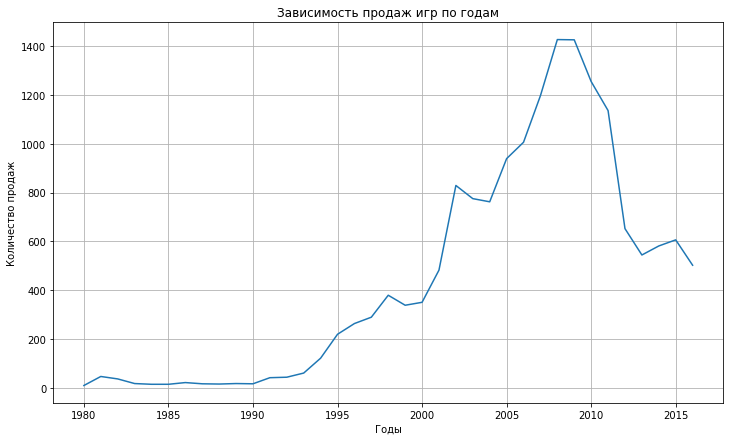

In [20]:
fig = games_per_years.plot(
    figsize=(12,7),
    grid=True,
    legend=False
)

fig.set_xlabel('Годы')
fig.set_ylabel('Количество продаж')
plt.title('Зависимость продаж игр по годам')

### Поиск самых прибыльных платформ

Посмотрим как менялись продажи по платформам, для чего построим сводную таблицу.

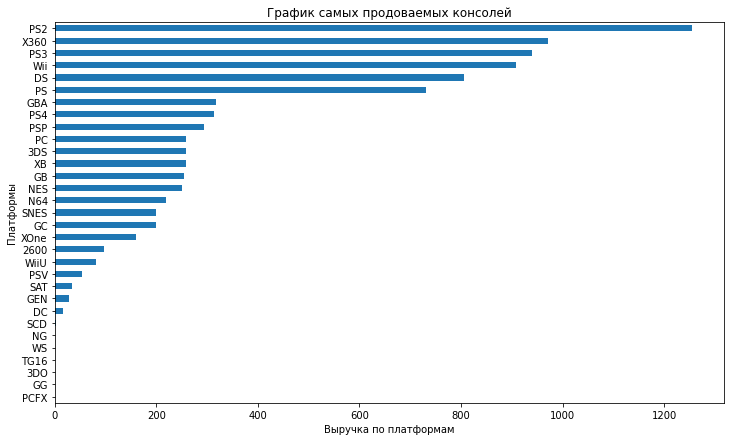

In [21]:
fig, ax = plt.subplots()

platform_per_year = (
    data
    .pivot_table(index='platform', values='all_sales', aggfunc='sum')
    .sort_values(by='all_sales', ascending=True)
    .plot(kind='barh', figsize=(12,7), legend=False, ax=ax)
    .set_title('График самых продоваемых консолей')
)

ax.set_xlabel('Выручка по платформам')
ax.set_ylabel('Платформы');

Видно, что больше всего продаж у PS2, X360, PS3, Wii, DS и PS.

Построим гистограммы платформ по годам.

In [22]:
most_platform_per_year = data.pivot_table(index='year_of_release', columns='platform', values='all_sales', aggfunc='sum')

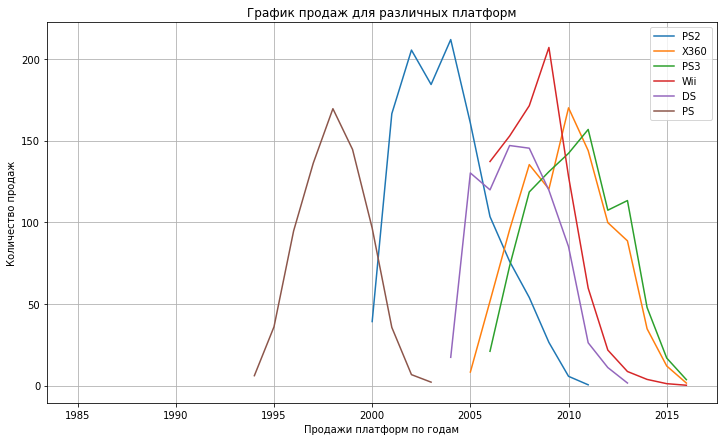

In [23]:
fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot()
plt.grid()
plt.plot(most_platform_per_year['PS2'])
plt.plot(most_platform_per_year['X360'])
plt.plot(most_platform_per_year['PS3'])
plt.plot(most_platform_per_year['Wii'])
plt.plot(most_platform_per_year['DS'])
plt.plot(most_platform_per_year['PS'])
plt.legend(('PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS'))
ax.set_xlabel('Продажи платформ по годам')
ax.set_ylabel('Количество продаж')
plt.title('График продаж для различных платформ');

Удалим аномалию для DS у 1985 года

In [24]:
len(data)

16712

In [25]:
data[(data['year_of_release'] == 1985) & (data['platform'] == 'DS')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,<NA>,NaN,RP,0.02


In [26]:
data = data[~((data['name'] == 'Strongest Tokyo University Shogi DS')
               & (data['year_of_release'] == 1985) & (data['platform'] == 'DS'))]

Построим новый график

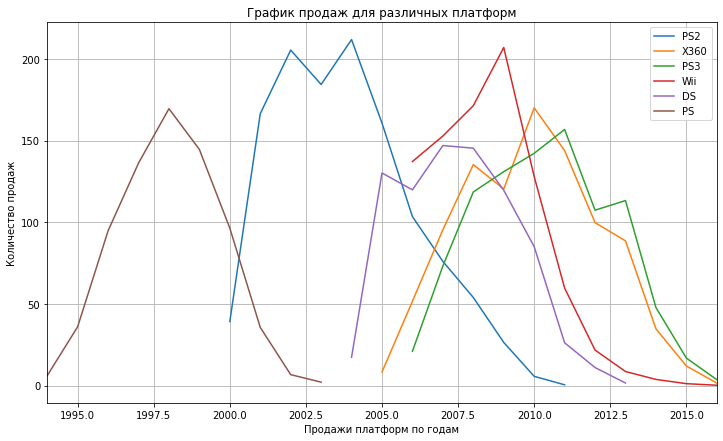

In [27]:
fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot()
plt.grid()
plt.plot(most_platform_per_year['PS2'])
plt.plot(most_platform_per_year['X360'])
plt.plot(most_platform_per_year['PS3'])
plt.plot(most_platform_per_year['Wii'])
plt.plot(most_platform_per_year['DS'])
plt.plot(most_platform_per_year['PS'])
plt.legend(('PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS'))
ax.set_xlabel('Продажи платформ по годам')
ax.set_ylabel('Количество продаж')
ax.set_xlim([1994,2016])
plt.title('График продаж для различных платформ');

### Установление актуального периода

Построим график для всех платформ.

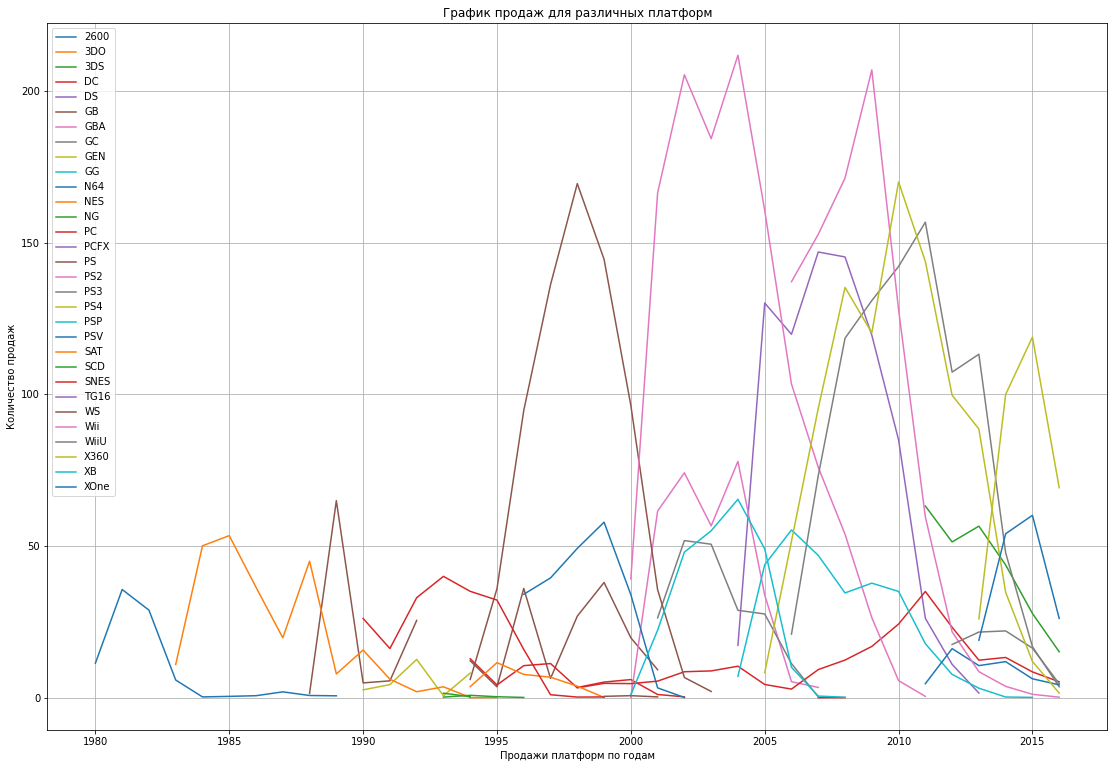

In [28]:
fig = plt.figure(figsize=(19,13))
ax = fig.add_subplot()
plt.grid()
plt.plot(most_platform_per_year)
plt.legend(most_platform_per_year.columns)
ax.set_xlabel('Продажи платформ по годам')
ax.set_ylabel('Количество продаж')
plt.title('График продаж для различных платформ');

График для всех платформ показывает, что примерное время популярности платформы от 5 до 15 лет, за исключением PC, игры на персональном компьютере скорее всего будут всегда. Наибольшие показатели продаж показывают, что такое время длится 2-3 года, поэтому выберем актуальный период с 2014 по 2016 года.

In [29]:
actual_data = data.query('year_of_release > 2013')

### Прибыльность платформ по актуальному периоду

Посмотрим, какие платформы самые прибыльные по актуальному периоду.

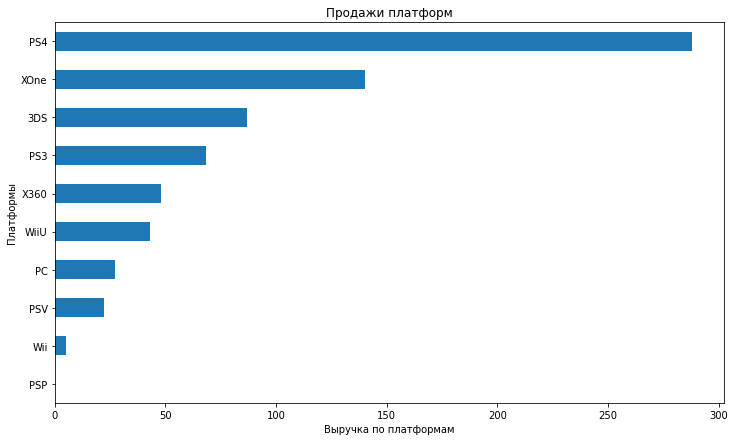

In [30]:
fig, ax = plt.subplots()

(actual_data
    .pivot_table(index='platform', values='all_sales', aggfunc='sum')
    .sort_values(by='all_sales', ascending=True)
    .plot(kind='barh', figsize=(12,7), legend=False,ax=ax)
    .set_title('Продажи платформ')
                    )

ax.set_xlabel('Выручка по платформам')
ax.set_ylabel('Платформы');
#platform_per_year.plot(kind='barh', figsize=(12,7), legend=False, rot=-5).set_title('Продажи платформ');

График показывает 10 актуальных платформ к 2014 году, самая популярная XboxOne, самая непопулярная PSP.

Найдём сколько игр вышло на PSP.

In [31]:
len(actual_data[actual_data['platform'] == 'PSP'].count())

12

Найдём количество игр за популярный период.

In [32]:
len(actual_data)

1689

PSP занимет меньше 1% относительно всех игр, следовательно от него можно избавиться

In [33]:
actual_data = actual_data.query('platform != "PSP"')
len(actual_data)

1676

### Динамика популяции платформ

Найдём, какие платформы набирали продажи, у каких платформ продажи падали и у кого остаются на одном уровне. 

In [34]:
actual_platform_per_year = (actual_data.
                            pivot_table(index='year_of_release', columns='platform', values='all_sales', aggfunc='sum'))

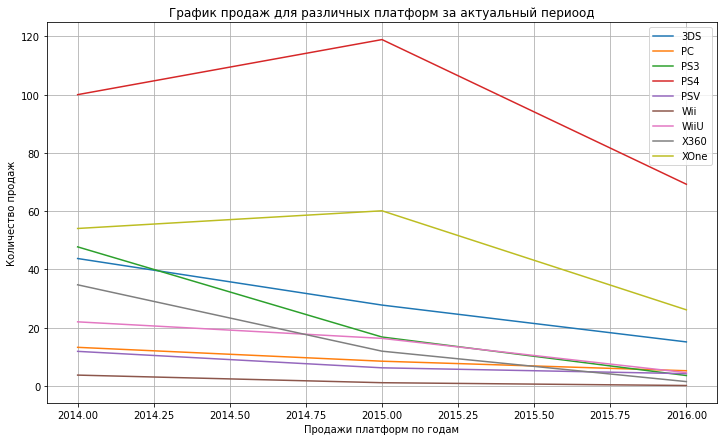

In [35]:
fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot()
plt.plot(actual_platform_per_year)
plt.legend(actual_platform_per_year.columns)
plt.grid()
ax.set_xlabel('Продажи платформ по годам')
ax.set_ylabel('Количество продаж')
plt.title('График продаж для различных платформ за актуальный периоод');

График показывает, что платфрмы PS4 и XboxOne набирают продажи, PS3 и Xbox360 теряют, а на WiiU и PC продажи остаются стабильными.

### Построение ящика с усами для различных платформ

Text(0, 0.5, 'Продажи')

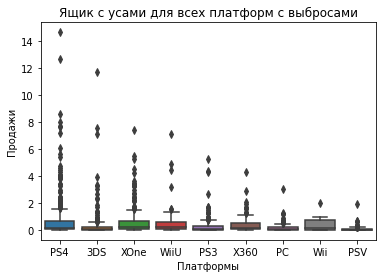

In [36]:
sns.boxplot(data=actual_data, x='platform', y='all_sales').set_title('Ящик с усами для всех платформ с выбросами')
sns.set_theme(rc={'figure.figsize':(13,8)})
plt.xlabel('Платформы')
plt.ylabel('Продажи')

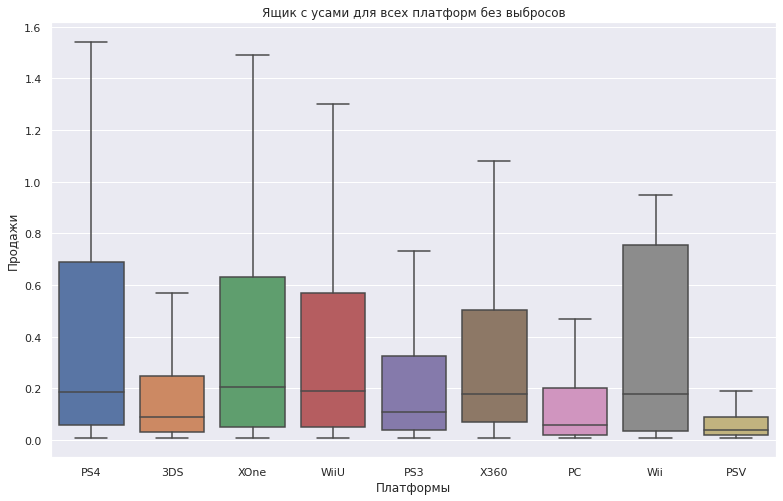

In [37]:
(sns.boxplot(data=actual_data, x='platform', y='all_sales', showfliers = False)
 .set_title('Ящик с усами для всех платформ без выбросов'))
plt.xlabel('Платформы')
plt.ylabel('Продажи');

Ящик с усами показывает, что наибольший межквартильный размах у PS4, XboxOne, WiiU и Wii, меньше у 3DS, PS3, PC и PSVita. У платформ с наибольшей дисперсией медиана на одном уровне, однако у платформ с дисперсией меньше наибольшая медиана у PS3, далее 3DS, наименьшая у PC и PSVita.

### Зависимость продаж от оценок критиков и пользователей для некоторых платформ

Рассмотрим такие платформы как PS4, XboxOne и PC

#### PS4

Посмотрим, как влияют продажи и отзывы пользователей и критиков на платформе PS4, для чего построим диаграмму рассеняния.

In [38]:
actual_data_ps4 = actual_data.query('platform == "PS4"')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


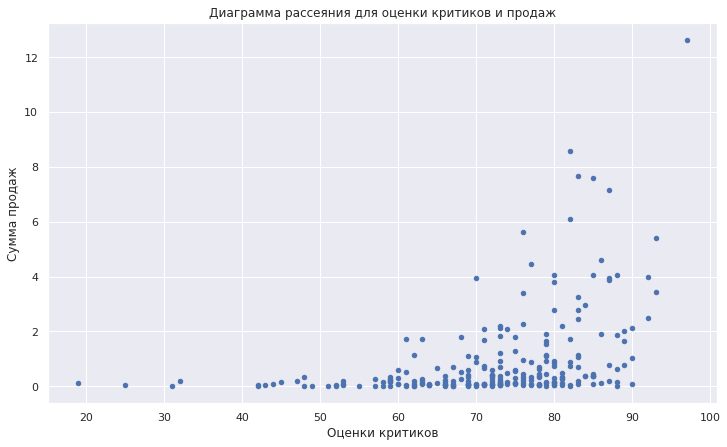

In [39]:
fig = actual_data_ps4.plot(
    x='critic_score',
    y='all_sales',
    kind='scatter',
    figsize=(12,7)
)
plt.title('Диаграмма рассеяния для оценки критиков и продаж')
plt.xlabel('Оценки критиков')
plt.ylabel('Сумма продаж');

Найдём коэффициент корреляции.

In [40]:
actual_data_ps4.dtypes

name                object
platform            object
year_of_release      Int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score         Int64
user_score         float64
rating              object
all_sales          float64
dtype: object

In [41]:
actual_data_ps4['all_sales'].corr(actual_data_ps4['critic_score'].astype('float'))

0.40266141068104083

Корреляция слабая, следовательно оценки критиков слабо влияют на общие продажи.

Проделаем то же самое с оценкой пользователей

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


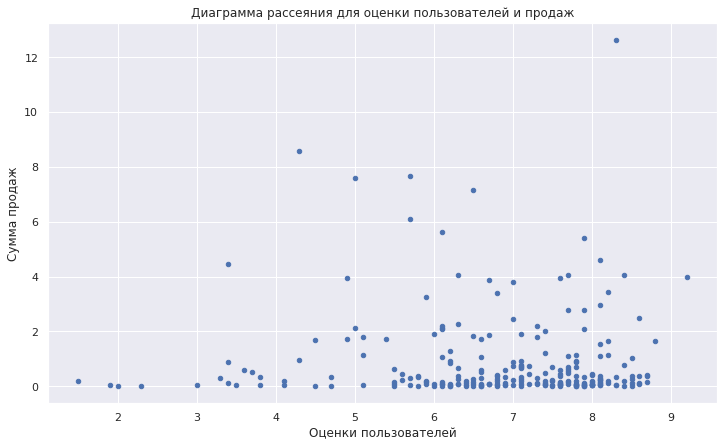

In [42]:
fig = actual_data_ps4.plot.scatter(
    x='user_score',
    y='all_sales',
    figsize=(12,7)
)
plt.title('Диаграмма рассеяния для оценки пользователей и продаж')
plt.xlabel('Оценки пользователей')
plt.ylabel('Сумма продаж');

Найдём коэффициент корреляции.

In [43]:
actual_data_ps4['all_sales'].astype('float').corr(actual_data_ps4['user_score'].astype('float'))

-0.040131589472697356

Корреляции нет.

#### XboxOne

Посмотрим, как влияют продажи и отзывы пользователей и критиков на платформе XboxOne, для чего построим диаграмму рассеняния.

In [44]:
actual_data_xone = actual_data.query('platform == "XOne"')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


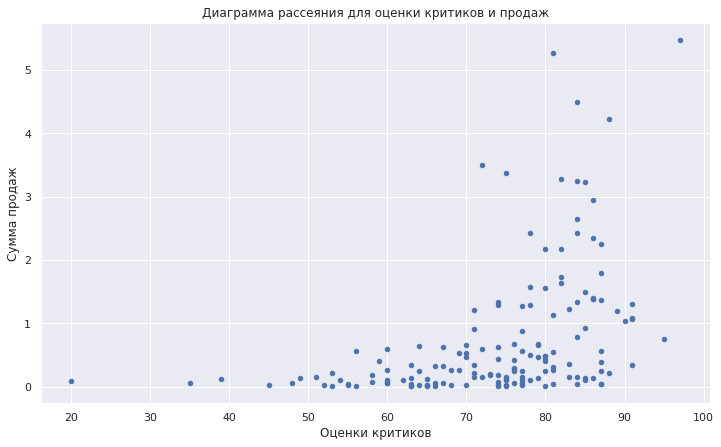

In [45]:
fig = actual_data_xone.plot(
    x='critic_score',
    y='all_sales',
    kind='scatter',
    figsize=(12,7)
)
plt.title('Диаграмма рассеяния для оценки критиков и продаж')
plt.xlabel('Оценки критиков')
plt.ylabel('Сумма продаж');

Найдём коэффициент корреляции.

In [46]:
actual_data_xone['all_sales'].corr(actual_data_xone['critic_score'].astype('float'))

0.42867694370333226

Корреляция слабая.

Проделаем то же самое для оценок пользователей.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


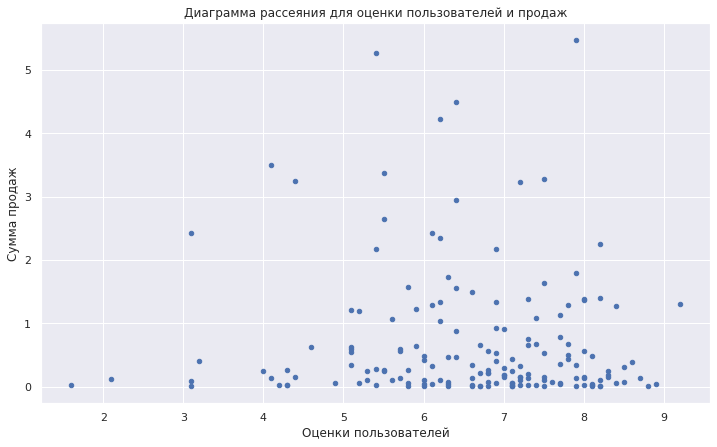

In [47]:
fig = actual_data_xone.plot(
    x='user_score',
    y='all_sales',
    kind='scatter',
    figsize=(12,7)
)
plt.title('Диаграмма рассеяния для оценки пользователей и продаж')
plt.xlabel('Оценки пользователей')
plt.ylabel('Сумма продаж');

Найдём коэффициент корреляции.

In [48]:
actual_data_xone['all_sales'].corr(actual_data_xone['user_score'].astype('float'))

-0.0703839280647581

Такое значение коэффициента говорит, что корреляции нет.

#### PC

Посмотрим, как влияют продажи и отзывы пользователей и критиков на платформе PC, для чего построим диаграмму рассеняния.

In [49]:
actual_data_pc = actual_data.query('platform == "PC"')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


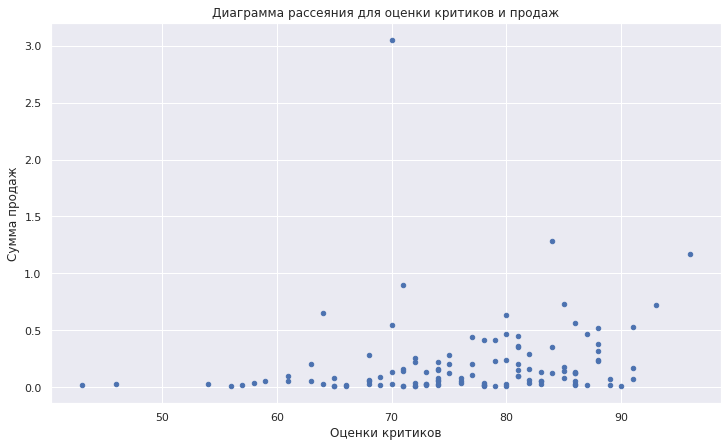

In [50]:
fig = actual_data_pc.plot(
    x='critic_score',
    y='all_sales',
    kind='scatter',
    figsize=(12,7)
)
plt.title('Диаграмма рассеяния для оценки критиков и продаж')
plt.xlabel('Оценки критиков')
plt.ylabel('Сумма продаж');

Найдём коэффициент корреляции

In [51]:
actual_data_pc['all_sales'].corr(actual_data_pc['critic_score'].astype('float'))

0.17463413769350036

Корреляции нет.

Построим диаграмму рассеяния для оценок пользователей.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


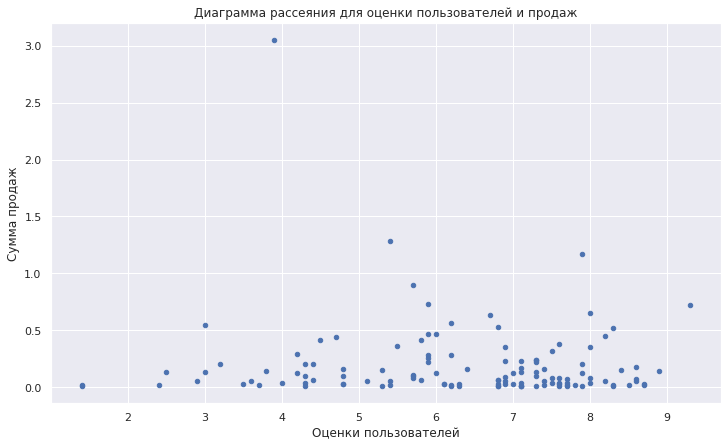

In [52]:
fig = actual_data_pc.plot(
    x='user_score',
    y='all_sales',
    kind='scatter',
    figsize=(12,7)
)
plt.title('Диаграмма рассеяния для оценки пользователей и продаж')
plt.xlabel('Оценки пользователей')
plt.ylabel('Сумма продаж');

Найдём коэффициент корреляции.

In [53]:
actual_data_pc['all_sales'].corr(actual_data_pc['user_score'].astype('float'))

-0.07159665703472452

Корреляции нет.

### Распределение по жанрам

Посмотрим на продажи игр разных жанров, для чего создадим сводную таблицу.

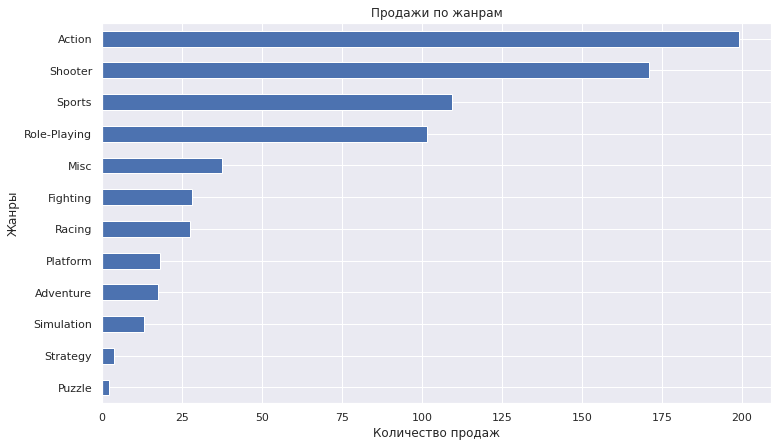

In [54]:
(actual_data
 .pivot_table(index='genre',values='all_sales', aggfunc='sum')
 .sort_values(by='all_sales')
 .plot(
    figsize=(12,7),
    kind='barh',
    legend=False
).set_title('Продажи по жанрам'))
plt.xlabel('Количество продаж')
plt.ylabel('Жанры');

Видно, что больше всего продаж по жанрам action, shooter и sport, меньше всего у adventure, strategy и puzzle.

Проанализируем жанры по прибыли с помощью диаграммы размаха.

Text(0, 0.5, 'Продажи')

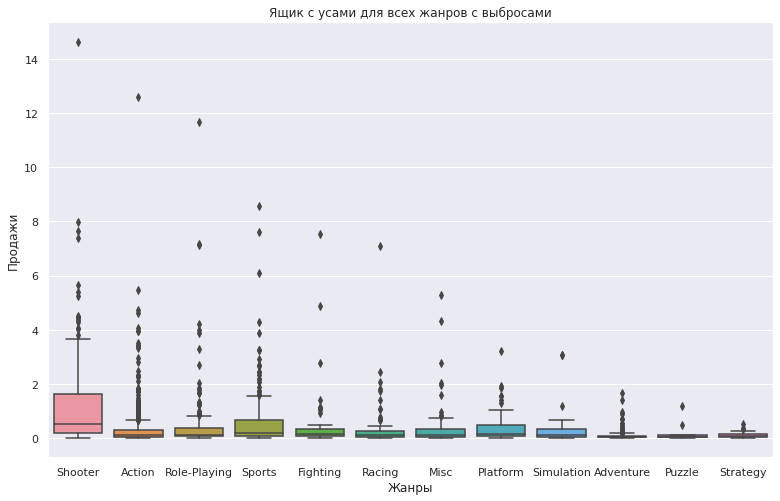

In [55]:
sns.boxplot(data=actual_data, x='genre', y='all_sales').set_title('Ящик с усами для всех жанров с выбросами')
sns.set_theme(rc={'figure.figsize':(14,9)});
plt.xlabel('Жанры')
plt.ylabel('Продажи')

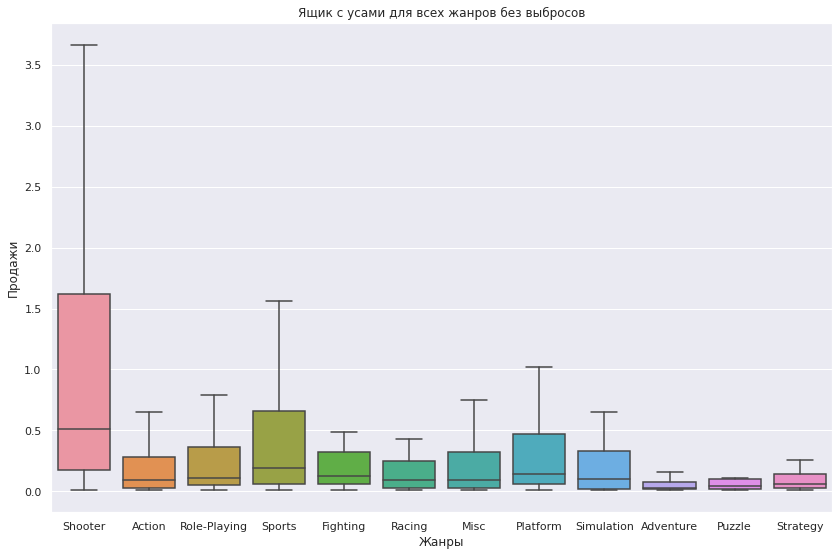

In [56]:
(sns.boxplot(data=actual_data, x='genre', y='all_sales', showfliers = False)
 .set_title('Ящик с усами для всех жанров без выбросов'))
plt.xlabel('Жанры')
plt.ylabel('Продажи');

Проводя исследование выяснилось, что средняя популярность платформы состовляет 5-15 лет, максимальная популярность длится 2-3 года. Самые популярные платформы за всё всемя это PS2, X360, PS3, Wii, DS и PS. Установился актуальный период, это с 2014 по 2016 годы. За актуальный период самая популярная платформа это PS4. Также выяснилось, что за актуальный период набирали популярность платформы PS4 и XboxOne, платформы PS3 и Xbox360 теряли популярность, а WiiU и PC оставались стабильными. По платформам PS4, XboxOne и PC исследовалось есть ли связь с отзывами критиков и пользователей с количеством продаж, выяснилось, что корреляция слабая, либо её нет.

## Составление портрета пользователя в каждом регионе

### Создание функции сводной таблицы и получение этих таблиц для регионов

Создадим функцию, которая будет создавать сводную таблицу для региона для популярных платформ и жанров.

In [57]:
def return_pivot_reg(data, mod, sales_str): #mod - platform or genre, sales_str - имя продаж в регионе
    data_pivot = (data
                  .pivot_table(index=mod, values=sales_str, aggfunc='sum')
                  .sort_values(by=sales_str, ascending=False)
                  .reset_index()
                  )
    data_pivot.loc[5, mod] = 'others'
    data_pivot.loc[data_pivot[mod] == 'others', sales_str] = data_pivot.loc[5:, sales_str].sum()
    data_pivot = data_pivot.loc[:5]
    return data_pivot

Получим сводную таблицу популярных платформ и жанров в регионе NA.

In [58]:
top5_na_sales_platform = return_pivot_reg(actual_data, 'platform', 'na_sales')
top5_na_sales_platform

,platform,na_sales
0,PS4,98.61
1,XOne,81.27
2,X360,28.30
3,3DS,22.64
4,PS3,22.05
5,others,31.19


In [59]:
top5_na_sales_genre = return_pivot_reg(actual_data, 'genre', 'na_sales')
top5_na_sales_genre

,genre,na_sales
0,Shooter,79.02
1,Action,72.53
2,Sports,46.13
3,Role-Playing,33.47
4,Misc,15.05
5,others,37.86


Получим сводную таблицу популярных платформ и жанров в регионе EU.

In [60]:
top5_eu_sales_platform = return_pivot_reg(actual_data, 'platform', 'eu_sales')
top5_eu_sales_platform

,platform,eu_sales
0,PS4,130.04
1,XOne,46.25
2,PS3,25.54
3,PC,17.97
4,3DS,16.12
5,others,34.76


In [61]:
top5_eu_sales_genre= return_pivot_reg(actual_data, 'genre', 'eu_sales')
top5_eu_sales_genre

,genre,eu_sales
0,Action,74.68
1,Shooter,65.52
2,Sports,45.73
3,Role-Playing,28.17
4,Racing,14.13
5,others,42.45


Получим сводную таблицу популярных платформ и жанров в регионе JP.

In [62]:
top5_jp_sales_platform = return_pivot_reg(actual_data, 'platform', 'jp_sales')
top5_jp_sales_platform

,platform,jp_sales
0,3DS,44.24
1,PS4,15.02
2,PSV,14.54
3,PS3,11.22
4,WiiU,7.31
5,others,0.40


In [63]:
top5_jp_sales_genre = return_pivot_reg(actual_data, 'genre', 'jp_sales')
top5_jp_sales_genre

,genre,jp_sales
0,Role-Playing,31.16
1,Action,29.38
2,Fighting,6.37
3,Misc,5.59
4,Shooter,4.87
5,others,15.36


### Создание графиков для популяоных платформ и жанров

Построим графики на основе сводных таблиц выше

Построим графики популярных платформ.

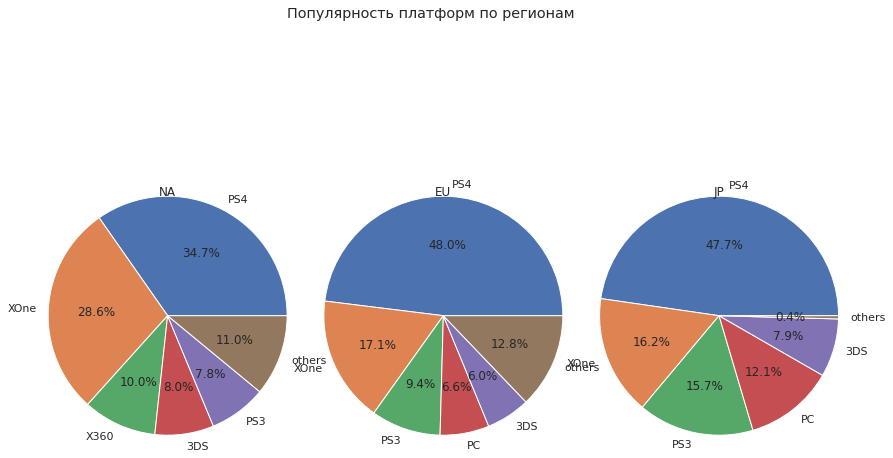

In [64]:
plt.subplot(1, 3, 1)
plt.pie(top5_na_sales_platform['na_sales'], labels=top5_na_sales_platform['platform'], autopct='%1.1f%%', radius=1.3)
plt.title('NA')
plt.subplot(1, 3, 2)
plt.pie(top5_eu_sales_platform['eu_sales'], labels=top5_eu_sales_platform['platform'], autopct='%1.1f%%', radius=1.3)
plt.title('EU')
plt.subplot(1, 3, 3)
plt.pie(top5_jp_sales_platform['jp_sales'], labels=top5_eu_sales_platform['platform'], autopct='%1.1f%%', radius=1.3)
plt.title('JP')
plt.suptitle('Популярность платформ по регионам');

График показывает, что в регионе NA самые популярные платформы это XboxOne и PS4, менее популярны Xbox360 и others, самые непопулярные 3DS и PS3. 
В регионе EU лидирует PS4, менее популярны XboxOne и остальные, самая непопулярные 3DS, PS3 и PC.
В регионе JP наиболее популярна PS4, далее XboxOne PS3 и PC, самые непопулярные 3DS и others.

Построим графики популярных жанров.

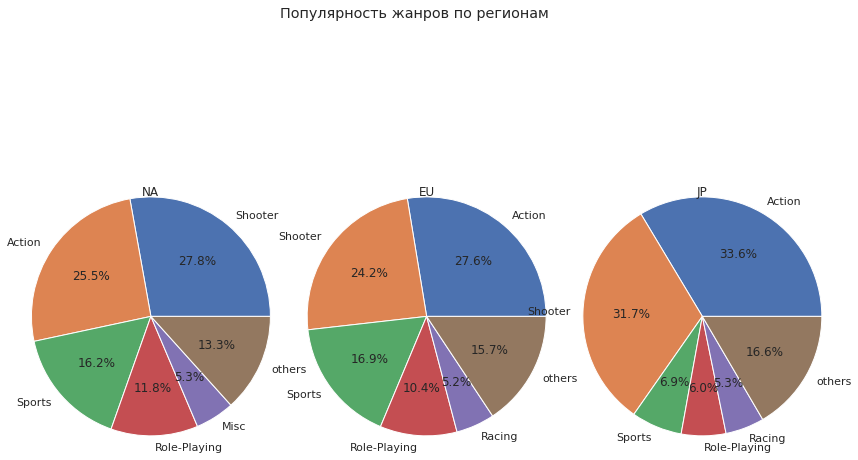

In [65]:
plt.subplot(1, 3, 1)
plt.pie(top5_na_sales_genre['na_sales'], labels=top5_na_sales_genre['genre'], autopct='%1.1f%%', radius=1.3)
plt.title('NA')
plt.subplot(1, 3, 2)
plt.pie(top5_eu_sales_genre['eu_sales'], labels=top5_eu_sales_genre['genre'], autopct='%1.1f%%', radius=1.3)
plt.title('EU')
plt.subplot(1, 3, 3)
plt.pie(top5_jp_sales_genre['jp_sales'], labels=top5_eu_sales_genre['genre'], autopct='%1.1f%%', radius=1.3)
plt.title('JP')
plt.suptitle('Популярность жанров по регионам');

В регионе NA лидируют action и shooter, менее популярны sports и others, самые непопулярные role-playing и misc.
В регионе EU похожая ситуация как в NA.
В регионе JP самые популярные жанры это action и shooter, менее популярны остальные, ещё менее непопулярны sports, RP и racing.

### Проверка влияет ли рейтинг ESRB на продажи.

Создадим сводную таблицу для региона NA.

In [66]:
esrb_na = actual_data.pivot_table(index='rating', values='na_sales', aggfunc='sum').reset_index()
esrb_na

,rating,na_sales
0,E,50.74
1,E10+,33.23
2,M,96.42
3,RP,64.72
4,T,38.95


Создадим сводную таблицу для региона EU.

In [67]:
esrb_eu = actual_data.pivot_table(index='rating', values='eu_sales', aggfunc='sum').reset_index()
esrb_eu

,rating,eu_sales
0,E,58.06
1,E10+,26.16
2,M,93.44
3,RP,58.95
4,T,34.07


Создадим сводную таблицу для региона JP.

In [68]:
esrb_jp = actual_data.pivot_table(index='rating', values='jp_sales', aggfunc='sum').reset_index()
esrb_jp

,rating,jp_sales
0,E,8.94
1,E10+,4.46
2,M,8.01
3,RP,56.54
4,T,14.78


Построим графики на основе сводных таблиц.

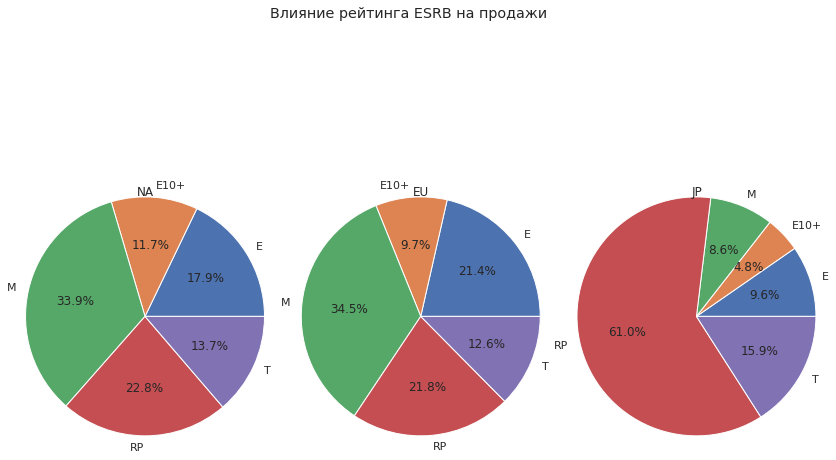

In [69]:
plt.subplot(1, 3, 1)
plt.pie(esrb_na['na_sales'], labels=esrb_na['rating'], autopct='%1.1f%%', radius=1.3)
plt.title('NA')
plt.subplot(1, 3, 2)
plt.pie(esrb_eu['eu_sales'], labels=esrb_eu['rating'], autopct='%1.1f%%', radius=1.3)
plt.title('EU')
plt.subplot(1, 3, 3)
plt.pie(esrb_jp['jp_sales'], labels=esrb_jp['rating'], autopct='%1.1f%%', radius=1.3)
plt.title('JP')
plt.suptitle('Влияние рейтинга ESRB на продажи');

Графики показывают, что наибольшие продажи в регионе NA занимает рейтинг M, далее идут RP и E, далее NA и T.
В регионе EU популярнее всего M, далее RP и E, после EU и T.
В регионе JP больше всего продаж у RP, далее T, M и E, далее E10+.

## Проверка гипотез.

Необходимо проверить, одинаковые ли средние пользовательские рейтинги платформ XOne и PC. Сформулируем две гипотезы: $H_0$ - средние пользовательские рейтинги платформ XOne и PC одинаковые, $H_1$ - средние рейтинги разные. Для проверки необходимо разобраться, будут ли выборки зависимыми. В данном случае нельзя сопоставить значение из одной выборке другой, следовательно выборки независимые

Подберём значение $\alpha$ для проверки гипотез.

In [70]:
alpha = 0.1

Проверим гипотезы.

In [71]:
result = st.ttest_ind(actual_data.loc[(actual_data['platform'] == 'PC') & (actual_data['user_score'] != 'tbd'), 'user_score']
                      .astype('float64').dropna(),
                      actual_data.loc[(actual_data['platform'] == 'XOne') & (actual_data['user_score'] != 'tbd'), 
                                      'user_score'].astype('float64').dropna())

print('Pvalue', result.pvalue)

if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

Pvalue 0.10450507919348415
Не отвергаем нулевую гипотезу


Значение pvalue сопостовимо с $\alpha$, следовательно требуются дополнительные исследования

In [72]:
# Приведены два датасета: сумма покупок, совершённых за месяц посетителями ...

sample_1 = [3071, 3636, 3454, 3151, 2185, 3259, 1727, 2263, 2015,
2582, 4815, 633, 3186, 887, 2028, 3589, 2564, 1422, 1785,
3180, 1770, 2716, 2546, 1848, 4644, 3134, 475, 2686,
1838, 3352]
sample_2 = [1211, 1228, 2157, 3699, 600, 1898, 1688, 1420, 5048, 3007,
509, 3777, 5583, 3949, 121, 1674, 4300, 1338, 3066,
3562, 1010, 2311, 462, 863, 2021, 528, 1849, 255,
1740, 2596]
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу
results = st.ttest_ind(
sample_1,
sample_2)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.1912450522572209
Не получилось отвергнуть нулевую гипотезу


Далее проверим совпадают ли рейтинги жанров action и sport, для чего построим две гипотезы. $H_0$ - средние пользовательские рейтинги двух жанров совпадают, $H_1$ - средние рейтинги не совпадают. Как и в случае с двумя платформами выборки будут независимы.

In [73]:
result = st.ttest_ind(actual_data.loc[(actual_data['genre'] == 'Action') & (actual_data['user_score'] != 'tbd'), 'user_score']
                      .astype('float64').dropna(),
                      actual_data.loc[(actual_data['genre'] == 'Sports') & (actual_data['user_score'] != 'tbd'), 
                                      'user_score'].astype('float64').dropna())

print('Pvalue', result.pvalue)

if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

Pvalue 2.8711147985105864e-19
Отвергаем нулевую гипотезу


Значение pvalue много меньше порога, следовательно средние пользовательские рейтинги двух жанров разные.

## Общий вывод.

Было проведено исследование продаж различных игр на различных платформах. Сначала необходимо было предобработать данные, некоторые удалились, некоторые остались.

Далее исследовалось популярность платформ, было выяснено, что популярность платформы длится от 5 до 15 лет за исключением PC, пик популярности в среднем длится 3-5 лет, поэтому актуальный период был выбран с 2014 по 2016 года. Из сводной таблицы, которая включала в себя 10 платформ была удалена PSP, так как игр на ней к 2014 году было очень мало. Из платформ, набирающие популярность были PS4 и XboxOne, теряющие популярность PS3 и Xbox360, остальные оставались на одном уровне.

Далее был составлен топ-5 платформ для различных регионов, самые популярные для всех регионов были PS4 и XboxOne. Самые популярные жанры это action и shooter. Также исследовалось влияет ли рейтинг ESRB на продажи, для каждого региона данные рознились.

После было проверено две гипотезы, первая одинаковые ли продажи для PС и XboxOne, значение pvalue говорило о том, что необходимо провести дополнительные исследования. Вторая гипотеза должна была установить, одинаковые ли рейтинги жанров action и sports, оказалось что не одинаковые